STOCK PREDICTION

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading the data 
market_risk= pd.read_csv("C:\\Users\\msodeeq\\Downloads\\Market+Risk+Dataset.csv")
market_risk.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [6]:
### Here I am doing to copy the original data in data frame called df.
df= market_risk.copy()
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


DRAW THE STOCK PRICE VS TIME

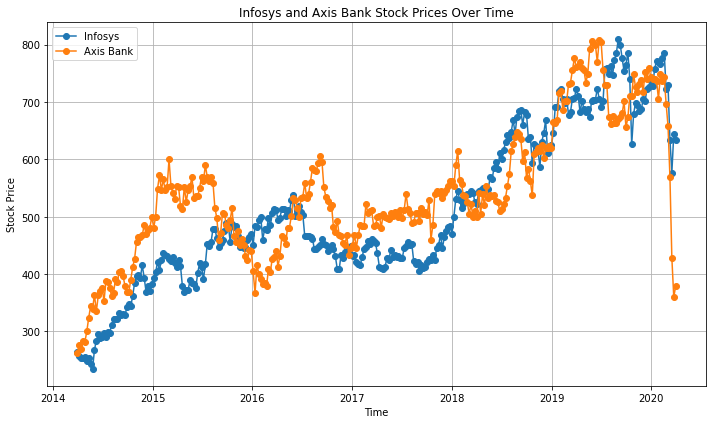

In [13]:
# Convert the 'Date' column to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Define the stocks for comparison
stock1 = 'Infosys'
stock2 = 'Axis Bank'

# Plot the Stock Price vs Time for the two selected stocks
plt.figure(figsize=(10,6))

# Plot for Stock 1 (Infosys)
plt.plot(df['Date'], df[stock1], label=stock1, marker='o')

# Plot for Stock 2 (Axis Bank)
plt.plot(df['Date'], df[stock2], label=stock2, marker='o')

# Adding titles and labels
plt.title(f'{stock1} and {stock2} Stock Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Adding grid, legend, and displaying the plot
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# Calculate stock returns as percentage change in stock price over time
returns = df.set_index('Date').pct_change() * 100

# Display the first few rows of the returns
print(returns.head())


             Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank      SAIL  \
Date                                                                           
2014-03-31       NaN           NaN                  NaN        NaN       NaN   
2014-04-07 -2.651515     -1.449275             0.659341   4.942966  2.941176   
2014-04-14 -1.167315      0.000000            -0.873362  -2.173913 -2.857143   
2014-04-21 -0.393701      0.000000             7.488987   4.814815  0.000000   
2014-04-28  1.185771     -4.411765            -1.229508  -0.353357 -7.352941   

            Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
Date                                                                            
2014-03-31           NaN         NaN           NaN            NaN          NaN  
2014-04-07      3.337543    9.909910     -6.375839       1.204819     8.992806  
2014-04-14     -1.379190   -0.491803      0.000000      -1.190476    -7.590759  
2014-04-21      0.761197   -0.4942

STOCK MEAN AND STANDARD STANDARD DEVIATION OF STOCKS

In [15]:
# Calculate the mean and standard deviation for all stocks
# Exclude the 'Date' column from calculations
stock_means = df.mean(numeric_only=True)
stock_std_dev = df.std(numeric_only=True)

# Create a dataframe to display both the mean and standard deviation together
stats_df = pd.DataFrame({
    'Mean': stock_means,
    'Standard Deviation': stock_std_dev
})

# Display the results
print(stats_df)


                             Mean  Standard Deviation
Infosys                511.340764          135.952051
Indian Hotel           114.560510           22.509732
Mahindra & Mahindra    636.678344          102.879975
Axis Bank              540.742038          115.835569
SAIL                    59.095541           15.810493
Shree Cement         14806.410828         4288.275085
Sun Pharma             633.468153          171.855893
Jindal Steel           147.627389           65.879195
Idea Vodafone           53.713376           31.248985
Jet Airways            372.659236          202.262668


PLOT GRAPH FOR STOCK MEAN AND STANDARD DEVIATION

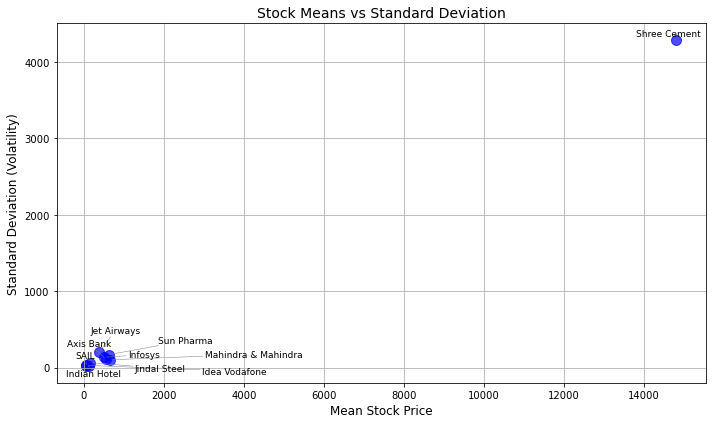

In [17]:
from adjustText import adjust_text


# Calculate the mean and standard deviation for all stocks, excluding 'Date'
stock_means = df.mean(numeric_only=True)
stock_std_dev = df.std(numeric_only=True)

# Remove the 'Date' column from means and standard deviation calculations
stock_means_clean = stock_means.drop(index='Date', errors='ignore')
stock_std_dev_clean = stock_std_dev.drop(index='Date', errors='ignore')

# Create a scatter plot for Stock Means vs Standard Deviation
plt.figure(figsize=(10,6))
plt.scatter(stock_means_clean, stock_std_dev_clean, color='b', s=100, alpha=0.7)

# Add labels to each point, adjusting their positions to avoid overlap
texts = [plt.text(stock_means_clean[i], stock_std_dev_clean[i], stock, fontsize=9) 
         for i, stock in enumerate(stock_means_clean.index)]

# Automatically adjust text positions for clarity
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add plot title and axis labels
plt.title('Stock Means vs Standard Deviation', fontsize=14)
plt.xlabel('Mean Stock Price', fontsize=12)
plt.ylabel('Standard Deviation (Volatility)', fontsize=12)

# Show grid for better readability and display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


CONCLUSION AND RECOMMENDATION

Conclusions:
1. Volatility and Price: High mean stock prices, like Shree Cement and Infosys, show higher volatility, indicating greater price fluctuations and market sensitivity.

2. Stable Options: Low mean, low volatility stocks such as SAIL and Indian Hotel provide stability, appealing to risk-averse investors.

3. High-Risk, High-Reward: Stocks like Jet Airways and Shree Cement offer potential high returns but come with increased risk due to greater volatility.

4. Diversification: Balancing high- and low-volatility stocks helps in managing risk while capturing growth opportunities.

Recommendations:
1. For Risk-Averse Investors: Prioritize stable stocks with low volatility like SAIL and Indian Hotel for consistent, lower-risk returns.

2. For Aggressive Investors: Consider volatile stocks such as Shree Cement for higher potential gains, but manage with caution due to higher risk.

3. Diversify: Combine stable and volatile stocks to balance risk and reward.

4. Monitor Regularly: Regularly track stock performance to adjust strategies in response to market changes.